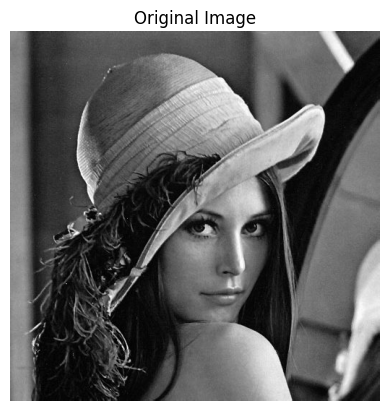

Image Size: 512x512, Channels: 3
Total Pixels: 262144
Black Pixel Count: 200715


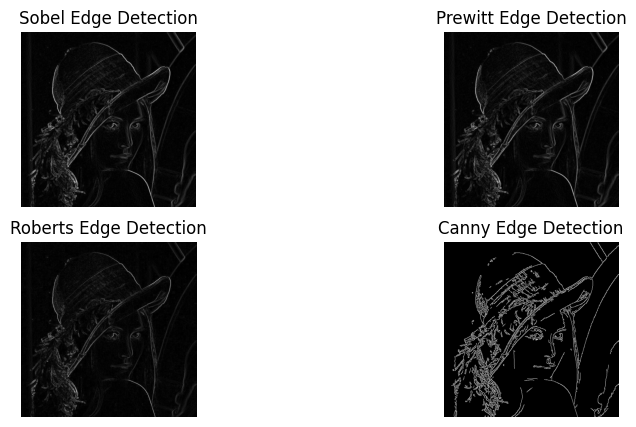

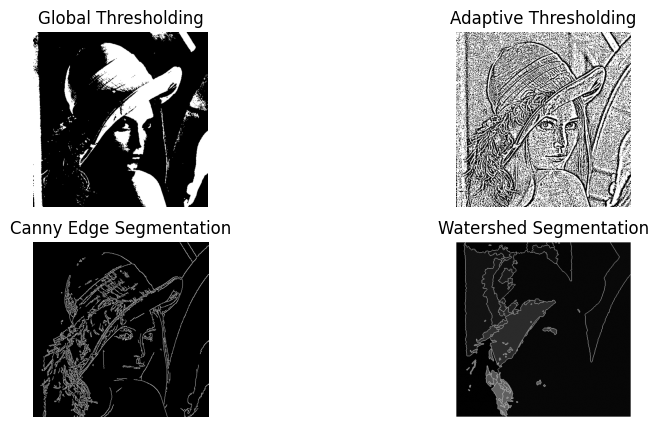

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, prewitt, roberts

# Read the image
image_path = 'Picture2.jpg'
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Extract image size
height, width, channels = image_rgb.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

# Calculate total pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

# Convert to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite("grayscale.jpg", gray_image)

# Convert to binary using threshold
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary.jpg", binary_image)

# Count black pixels
black_pixels = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixels}")

# Edge detection
sobel_edges = sobel(gray_image)
prewitt_edges = prewitt(gray_image)
roberts_edges = roberts(gray_image)
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display edge detection results
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

# Image segmentation
# Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
# Watershed Segmentation
gray_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
ret, markers = cv2.connectedComponents(cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1])
markers = cv2.watershed(image_rgb, markers)
watershed_result = np.uint8(markers)

# Display segmentation results
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Segmentation')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(watershed_result, cmap='gray')
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()
